# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye : 5 + 1.9 * x + e
* e : estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act = y_act.tolist()

In [7]:
data = pd.DataFrame({
    "x":x_list,
    "y":y_act,
    "y_pred":y_pred_list
})

In [8]:
data.head()

,x,y,y_pred
0,0.585344,6.423273,6.112154
1,1.882765,8.042982,8.577253
2,1.759813,8.915282,8.343645
3,1.876780,7.996981,8.565882
4,1.428785,7.766298,7.714691


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

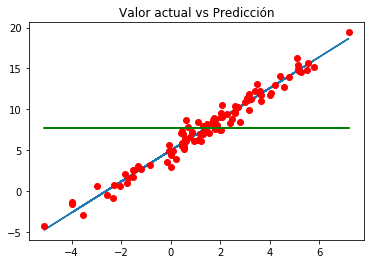

In [11]:
%matplotlib inline
plt.plot(data["x"], y_pred)
plt.plot(data["x"], data["y"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.title("Valor actual vs Predicción")

## ¿Cómo es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una destribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación enter 0 y 1

In [12]:
#SSR = sumatoria de los cuadrados de la regresión
#SSD = sumatoria de los cuadrados de la diferencia
#SST = sumatoria de los cuadrados totales
data["SSR"] = (data["y_pred"] - np.mean(y_act))**2
data["SSD"] = (data["y_pred"] - data["y"])**2
data["SST"] = (data["y"] - np.mean(y_act))**2

In [13]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,0.585344,6.423273,6.112154,2.705795,0.096795,1.779052
1,1.882765,8.042982,8.577253,0.672677,0.285445,0.081737
2,1.759813,8.915282,8.343645,0.344053,0.326770,1.341422
3,1.876780,7.996981,8.565882,0.654154,0.323648,0.057551
4,1.428785,7.766298,7.714691,0.001797,0.002663,0.000085


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

2058.9905067409863

In [16]:
SSD

68.44224729036354

In [17]:
SST

2095.840515282473

In [18]:
SSR+SSD

2127.4327540313498

In [19]:
R2 = SSR/SST

In [20]:
R2

0.9824175512054552

(array([ 1.,  0.,  9.,  7., 18., 23., 19., 14.,  7.,  2.]),
 array([-2.53865826, -2.08252824, -1.62639822, -1.1702682 , -0.71413818,
        -0.25800815,  0.19812187,  0.65425189,  1.11038191,  1.56651193,
         2.02264195]),
 <a list of 10 Patch objects>)

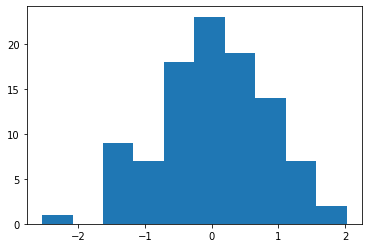

In [21]:
plt.hist(data["y_pred"] - data["y"])

## Obteniendo la recta de regresión
* y = a + b * x 
* b = sum((xi - x_m)*(y_i - y_m) / sum((xi - x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y"])
x_mean, y_mean

(1.456102421220376, 7.757084302995002)

In [23]:
#n numerador, d denominador
data["beta_n"] = (data["x"] - x_mean) * (data["y"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [24]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(5.011702344312987, 1.8854319027785695)

El modelo lineal obtenido por regresión es: y = 4.850599681167868 + 1.925642104504836

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,0.585344,6.423273,6.112154,2.705795,0.096795,1.779052,1.161427,0.758220,6.115329
1,1.882765,8.042982,8.577253,0.672677,0.285445,0.081737,0.121982,0.182041,8.561527
2,1.759813,8.915282,8.343645,0.344053,0.326770,1.341422,0.351757,0.092240,8.329710
3,1.876780,7.996981,8.565882,0.654154,0.323648,0.057551,0.100919,0.176970,8.550244
4,1.428785,7.766298,7.714691,0.001797,0.002663,0.000085,-0.000252,0.000746,7.705578


In [29]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean)**2)

In [30]:
SSR, SSD, SST

(2027.528358694212, 68.31215658825941, 2095.840515282473)

In [31]:
R2 = SSR / SST
R2

0.9674058421477486

Text(0.5, 1.0, 'Valor actual vs Predicción')

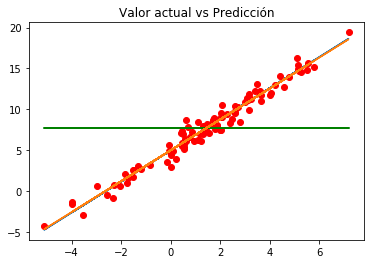

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(data["x"], y_pred)
plt.plot(data["x"], data["y"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8349028819744113

In [34]:
np.mean(data["y"])

7.757084302995002

In [35]:
RSE / np.mean(data["y"]) # 10,76% de error

0.10763101822318163